In [1]:
import time
start_time = time.time()


<div class="alert alert-block alert-warning">
<b>Note:</b>  The program is expected to run for a total duration of 17 minutes
</div>


# Predicting the Price of Used Cars Using Machine Learning Algorithms
<font color = 'Blue'> 
Names: Shin Le, Jeongyeon Kim, Benjamin Horvath, Nico Reategui, Paul Giglio


Final Report: https://docs.google.com/document/d/1zhQrkWmJjjMU6wIfBC78MygGzp-XUrkaUOWALfyAL9Q/edit
Dataset: https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<a id="0"></a> <br>
<font color = 'Blue'> 
# Table of Contents

1. [About Dataset](#1)
2. [Importing Libraries](#2)
3. [Loading Data](#4)
4. [Data Preprocessing](#5)
5. [Exploratory Data Analysis (EDA)](#6)
   1. [Filtering Data](#61)
   2. [Detecting Outliers](#62)
   3. [Labeling Encode](#63)
   4. [Correlation Matrix](#64)|
6. [Data Splitting](#7)
7. [Models Evaluations and Predictions](#8)
   1. [*Full Model* with *Linear Regression*](#81)
      1. [Using Sequential Feature Selection for the *Linear Regression*](#811)
   2. [*Decision Tree*](#82)
      1. [*A Pruned Tree*](#821)
   3. [Ensemble Method: *Random Forest Regression*](#83)
   4. [Ensemble Method: *Gradient Boosting Regression*](#84)
   5. [*Support Vector Machine* (SVM)](#85)
   6. [Comparing Models](#86)


<a id="1"></a>
<font color = 'blue'> 
## **1. About Dataset**

This dataset contains data about 762,091 used cars scraped from cars.com. The data was collected on Apr, 2023.

**Feature description**

* manufacturer - name of the car manufacturer
* model - name of the car model
* year - the year when the car was produced
* mileage - the number of miles the car has traveled since production
* engine - car engine
* transmission - type of the car's transmission
* drivetrain - type of the car's drivetrain
* fuel_type - type of fuel that the car consumes
* mpg - the number of miles a car can travel using one gallon of fuel (miles per gallon)
* exterior_color - car exterior color
* interior_color - car interior color
* accidents_or_damage - whether the car was involved in accidents
* one_owner - whether the car was owned by one person
* personal_use_only - whether the car was used only for personal purposes
* seller_name - name of the seller
* seller_rating - seller's rating
* driver_rating - car rating given by drivers
* driver_reviews_num - the number of car reviews left by drivers
* price_drop - price reduction from the initial price
* price - car price

<a id="2"></a>
<font color = 'blue'> 
## **2. Importing Libraries**

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# loading data
import zipfile

# Plot
import matplotlib.pyplot as plt 
from matplotlib.pyplot import subplots
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# splitting dataset into train and test data
from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso

# Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection as skm

# tree
from sklearn.tree import DecisionTreeRegressor,plot_tree ,export_text
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# SVM
from sklearn.svm import SVR

<a id="4"></a>
<font color = 'blue'> 
## **4. Loading Data**


<div class="alert alert-block alert-warning">
<b>Note:</b>  Change the "path" here to load the dataset
</div>

In [3]:
path='/Users/shinle/Library/CloudStorage/OneDrive-Personal/FSU Activities/Data Mining/cars.csv'
df = pd.read_csv(path)

<a id="5"></a>
<font color = 'blue'> 
## **5. Data Preprocessing**

In [4]:
# Use str.extract to create new columns
df[['Engine Displacement (L)', 'Engine Type', 'Engine Features']] = df['engine'].str.extract(r'(\d+\.\d+)L\s([A-Z0-9]+)\s(.+)$')

# Drop the original 'engine' column if you no longer need it
df = df.drop(columns=['engine'])

# Print the DataFrame
df

,manufacturer,model,year,mileage,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,Engine Displacement (L),Engine Type,Engine Features
0,Mazda,CX-90 3.3 Turbo Premium Plus,2024,1.0,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,51K,White,...,1.0,Cox Mazda,3.2,NaN,0,NaN,54920,3.3,I6,Turbo
1,Mazda,CX-90 S Premium Plus,2024,1.0,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,Artisan Red Metallic,White,...,1.0,Cox Mazda,3.2,NaN,0,NaN,61920,NaN,NaN,NaN
2,Acura,Integra A-Spec,2023,6.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Red,Ebony,...,0.0,Glenview Luxury Imports,4.9,4.6,5,NaN,37434,1.5,I4,16V GDI DOHC Turbo
3,Acura,Integra A-Spec Technology,2023,9705.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Platinum White Pearl,Ebony,...,1.0,Lindsay Acura,3.6,4.6,5,484.0,34516,1.5,I4,16V GDI DOHC Turbo
4,Acura,Integra A-Spec Technology,2023,6.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Performance,Orchid,...,1.0,Plaza Auto Mall,4.0,4.6,5,674.0,33221,1.5,I4,16V GDI DOHC Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758030,Toyota,Supra Turbo,1995,15800.0,6-Speed Manual,NaN,Gasoline,17-23,Black,Tan,...,1.0,Motorcar Classics,3.7,4.9,7,10000.0,89900,3.0,I6,24V SPFI DOHC Turbo
758031,Toyota,Supra Turbo,1995,44614.0,6-Speed Manual,Rear-wheel Drive,Gasoline,NaN,Silver,Black,...,1.0,Gold Coast Motors,NaN,4.9,7,6000.0,109900,3.0,I6,Turbo
758032,Volkswagen,Eurovan,1995,91849.0,Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,...,1.0,Pacific Auto Center - Fontana,3.1,4.8,3,1000.0,31995,NaN,NaN,NaN
758033,Volkswagen,Eurovan Campmobile,1995,190336.0,5-Speed Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,...,1.0,Lot 99,1.4,4.8,3,1000.0,25995,5.2,I5,10V SOHC


##### Before handling data
* Show the frequency of unique values for each column. This will initially show us the classes which have the highest frequency. We consider these as outliers.

In [5]:
for feature in df.columns.tolist():
    print(f"{df[feature].value_counts()}, \n")

Ford             78680
Toyota           59393
Chevrolet        54828
Nissan           48482
Jeep             41543
Mercedes-Benz    40582
Honda            37601
BMW              37509
Kia              35063
GMC              29507
Dodge            25102
Subaru           24762
Volkswagen       24485
Hyundai          22203
Lexus            21292
RAM              19364
Audi             17863
Cadillac         17614
Mazda            15431
Buick            14509
Chrysler         12609
INFINITI         12287
Land Rover       12139
Porsche          11214
Lincoln          10518
Volvo            10022
Acura             8468
Tesla             5883
Mitsubishi        5737
Jaguar            3345
Name: manufacturer, dtype: int64, 

Fusion SE                                3172
Sportage LX                              2873
Corolla LE                               2835
GLC 300 Base 4MATIC                      2718
Sentra SV                                2652
                                         ...

<a id="6"></a>
<font color = 'blue'> 
## **6. Exploratory Data Analysis (EDA)**

<a id="61"></a>
<font color = 'blue'> 
### ***1. Filtering data***


* #### Handle Missing value
   * Price Column - Target

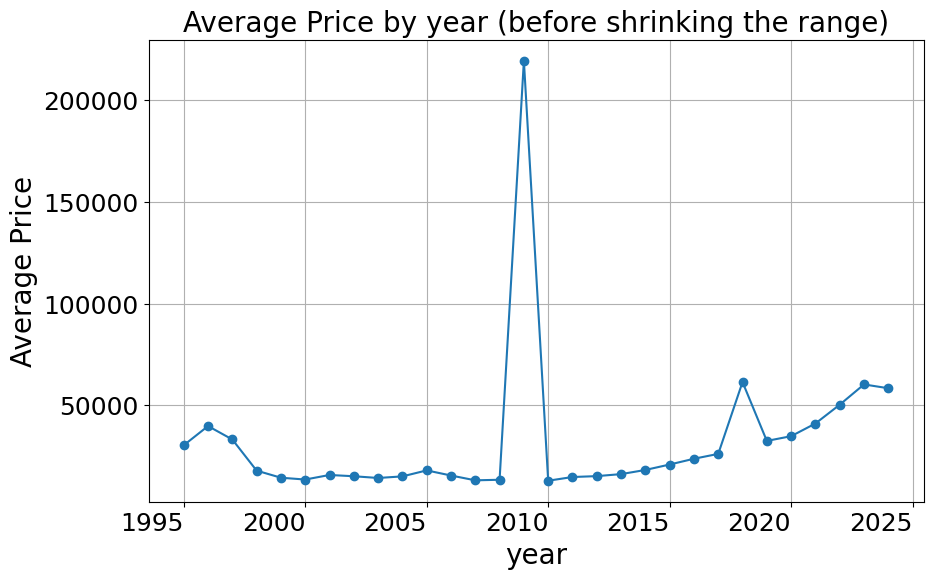

In [6]:
# before shrinkage
mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (before shrinking the range)', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Problem:</b>
The original dataset has the abnormal Average Price in year 2009. So, we shrink the Price in the range (0,200000). This could a way to handle outliers. 
</div>



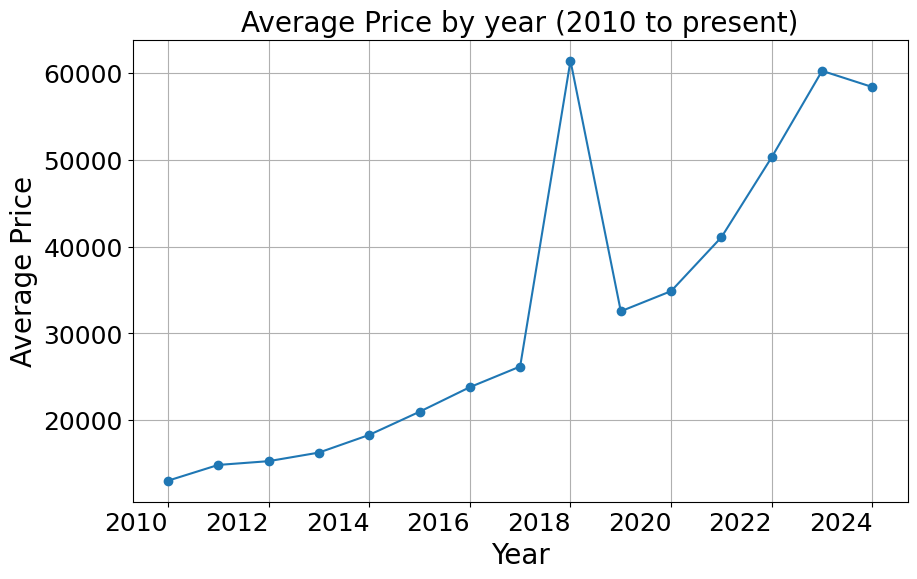

In [7]:
# Filter the DataFrame to include data from 2010 to the present
df_filtered = df[df['year'] >= 2010]

# Group by year and calculate the mean price
mean_prices_by_year = df_filtered.groupby('year')['price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (2010 to present)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

In [8]:
df = df.loc[df['price'].between(0, 200000)].copy()

In [9]:
# Group by the 'year' column and calculate the Average Price for each year
yearly_mean_prices = df.groupby('year')['price'].mean()

# Fill NaN values in the 'price' column with the Average Price of their respective year
df['price'].fillna(df['year'].map(yearly_mean_prices), inplace=True)

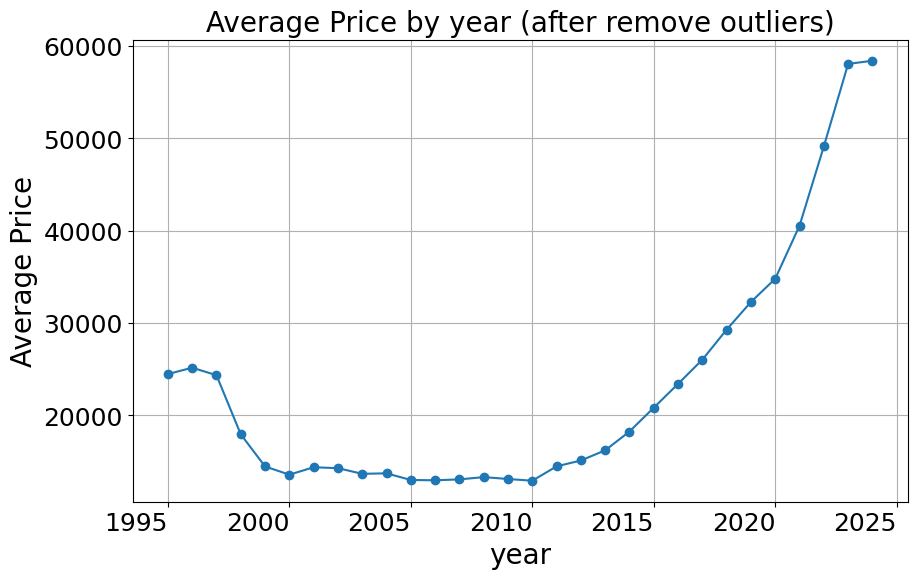

In [10]:
mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (after remove outliers)', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

#### Mapping from long form to abbreviation


* `Drivetrain`

In [11]:
drivetrain_mapping = {
    'All-wheel Drive': 'AWD',
    'Front-wheel Drive': 'FWD',
    'Four-wheel Drive': '4WD',
    'Rear-wheel Drive': 'RWD'
}
df['drivetrain'] = df['drivetrain'].replace(drivetrain_mapping)

* fuel_type

In [12]:
drivetrain_mapping = {
    'Gasoline Fuel': 'Gasoline',
    'Gas': 'Gasoline',
    'Plug-In Hybrid': 'Hybrid',
    'Hybrid Fuel': 'Hybrid',
    'Gas/Electric Hybrid': 'Hybrid',
    'Gasoline/Mild Electric Hybrid': 'Hybrid',
    'Diesel Fuel': 'Diesel',
    'Rear-wheel Drive': 'Electric',
    'E85 Flex Fuel': 'Flex Fuel',
    'Flex Fuel Capability': 'Flex Fuel'
}
df['fuel_type'] = df['fuel_type'].replace(drivetrain_mapping)

* #### Splitting `MPG` column into two separate columns

In [13]:
df['mpg'].fillna('0-0', inplace=True)

In [14]:
# Split the "MPG Range" into two columns
df[['City MPG', 'Highway MPG']] = df['mpg'].str.split('-', expand=True)

In [15]:
# Custom function to convert elements to int or replace with zero
def convert_to_int_or_zero(value):
    if isinstance(value, str):
        # Remove non-numeric characters and try to convert to int
        numeric_value = ''.join(filter(str.isdigit, value))
        if numeric_value:
            return int(numeric_value)
    return 0

# Apply the custom function to 'City MPG' and 'Highway MPG' columns
df['City MPG'] = df['City MPG'].apply(convert_to_int_or_zero)
df['Highway MPG'] = df['Highway MPG'].apply(convert_to_int_or_zero)

In [16]:
# Replace "N/A" values with 0
df['City MPG'] .replace(0, np.nan, inplace=True)
df['Highway MPG'].replace(0, np.nan, inplace=True)

In [17]:
df= df.drop('mpg', axis=1)

In [18]:
df.isnull().sum()

manufacturer                    0
model                           0
year                            0
mileage                       478
transmission                 9558
drivetrain                  19410
fuel_type                   21103
exterior_color               8680
interior_color              56253
accidents_or_damage         24026
one_owner                   29230
personal_use_only           24130
seller_name                  8495
seller_rating              210877
driver_rating               29309
driver_reviews_num              0
price_drop                 348758
price                           0
Engine Displacement (L)    116191
Engine Type                116191
Engine Features            116191
City MPG                   145894
Highway MPG                153944
dtype: int64

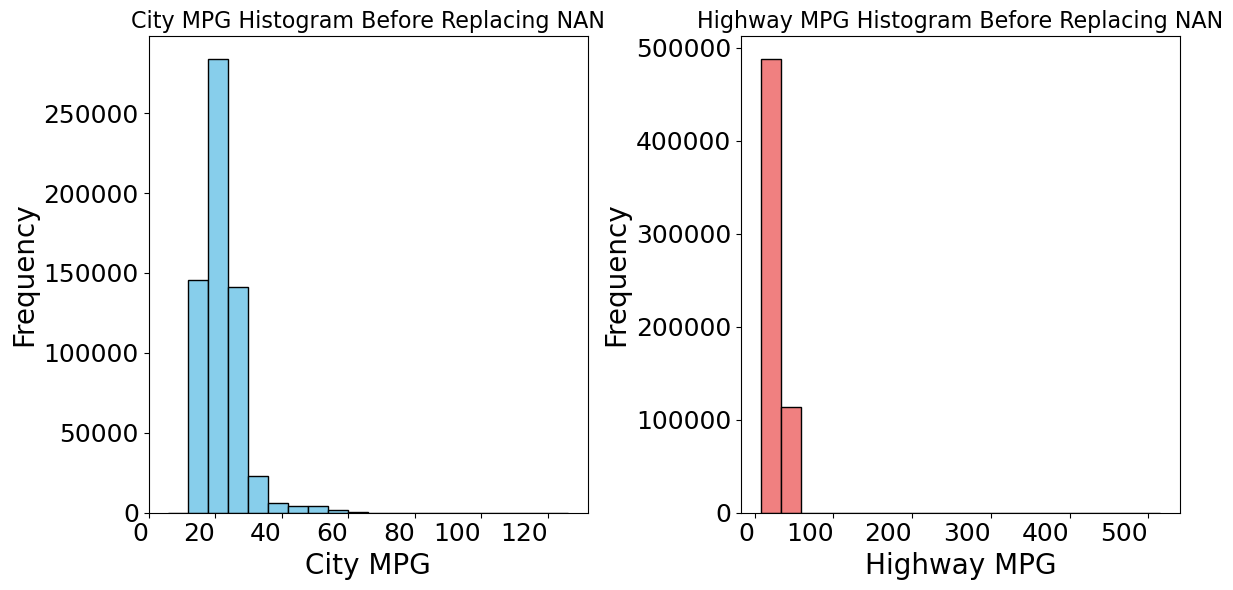

In [19]:
def create_mpg_histogram(data, title_str):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data['City MPG'], bins=20, color='skyblue', edgecolor='black')
    plt.title('City MPG Histogram ' + title_str + ' Replacing NAN', fontsize=16)
    plt.xlabel('City MPG', fontsize=20)
    # Add font size for ticks
    plt.xticks(ha='right', fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylabel('Frequency', fontsize=20)
        

    plt.subplot(1, 2, 2)
    plt.hist(data['Highway MPG'], bins=20, color='lightcoral', edgecolor='black')
    plt.title('Highway MPG Histogram ' + title_str + ' Replacing NAN', fontsize=16)
    plt.xlabel('Highway MPG', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    # Add font size for ticks
    plt.xticks(ha='right', fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()

    # Show the histograms
    plt.show()
    
create_mpg_histogram(df, 'Before')

* #### **Replace `NAN` in '`City MPG`' and '`Highway MPG`' by the `Mean` of each column**

In [20]:
df['City MPG'] .replace(np.nan,df['City MPG'].mean(), inplace=True)
df['Highway MPG'].replace(np.nan,df['Highway MPG'].mean(), inplace=True)

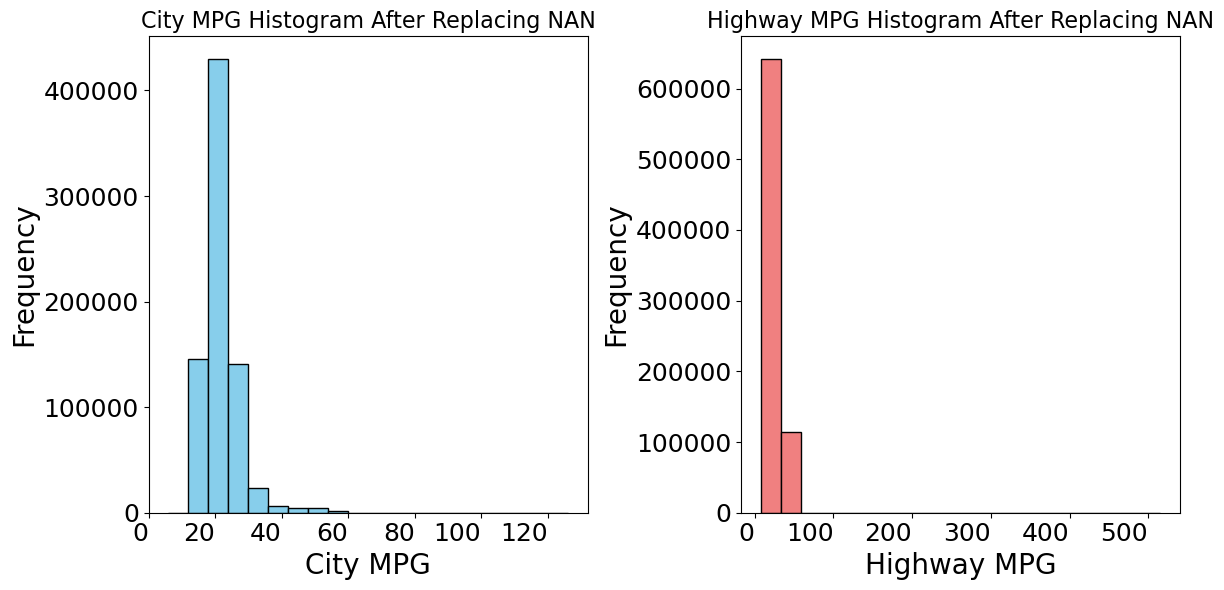

In [21]:
create_mpg_histogram(df, 'After')

In [22]:
df= df.drop('price_drop', axis=1)       #Drop this column since it does not provide useful information and has a lot of null values.

* #### **Handling `NAN` in `seller_rating`**

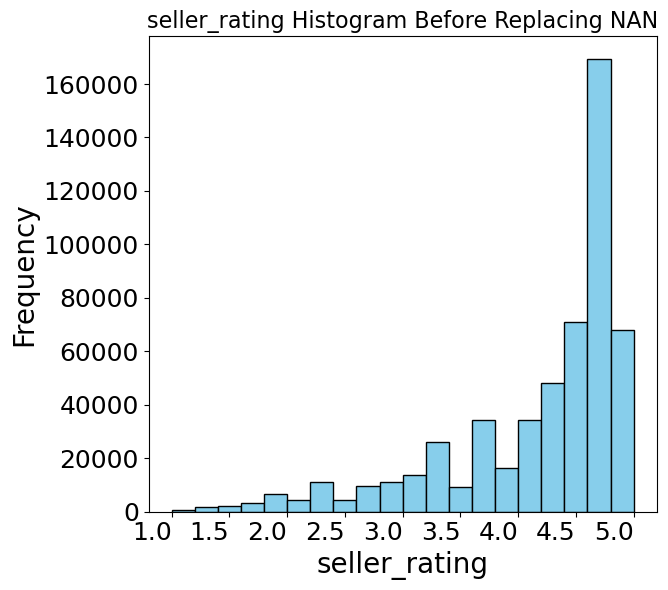

In [23]:

def create_seller_rating_histograms(data, title_str):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data['seller_rating'], bins=20, color='skyblue', edgecolor='black')
    plt.title('seller_rating Histogram ' + title_str + ' Replacing NAN', fontsize=16)
    plt.xlabel('seller_rating', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    # Add font size for ticks
    plt.xticks(ha='right', fontsize=18)
    plt.yticks(fontsize=18)
        
    plt.tight_layout()

    # Show the histograms
    plt.show()
    
create_seller_rating_histograms(df, 'Before')

In [24]:
df['seller_rating'].replace(np.nan,df['seller_rating'].mean(), inplace=True) #replace missing value by the mean

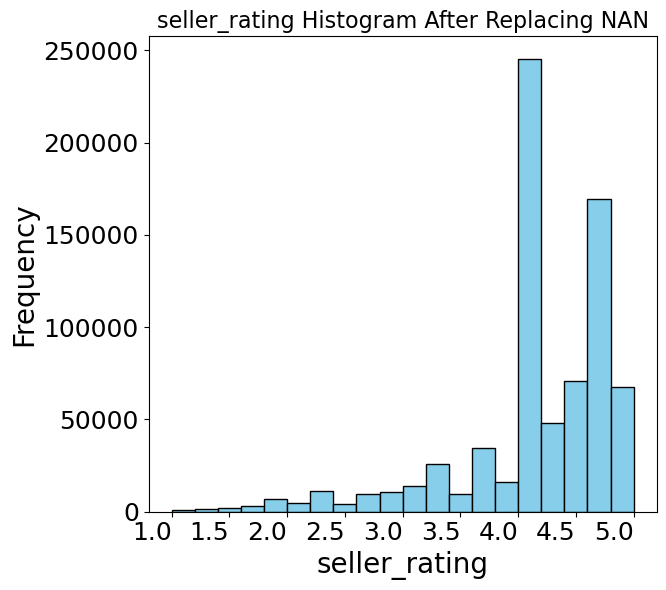

In [25]:
create_seller_rating_histograms(df, 'After')

In [26]:
df.dropna()

,manufacturer,model,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,...,seller_name,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
2,Acura,Integra A-Spec,2023,6.0,Automatic CVT,FWD,Gasoline,Red,Ebony,0.0,...,Glenview Luxury Imports,4.900000,4.6,5,37434,1.5,I4,16V GDI DOHC Turbo,29.000000,36.000000
3,Acura,Integra A-Spec Technology,2023,9705.0,Automatic CVT,FWD,Gasoline,Platinum White Pearl,Ebony,0.0,...,Lindsay Acura,3.600000,4.6,5,34516,1.5,I4,16V GDI DOHC Turbo,29.000000,36.000000
6,Acura,Integra A-Spec Technology,2023,10805.0,6-Speed Manual,FWD,Gasoline,Gray,Ebony,0.0,...,Honda of Keene,4.500000,4.6,5,37500,1.5,I4,16V GDI DOHC Turbo,26.000000,36.000000
7,Acura,Integra A-Spec,2023,6612.0,Automatic CVT,FWD,Gasoline,Apex Blue Pearl,Ebony,0.0,...,Audi Fort Myers,4.600000,4.6,5,32995,1.5,I4,16V GDI DOHC Turbo,29.000000,36.000000
8,Acura,Integra A-Spec Technology,2023,3305.0,Automatic CVT,FWD,Gasoline,Performance Red Pearl,Orchid,0.0,...,Acura of Concord,4.159732,4.6,5,34019,1.5,I4,16V GDI DOHC Turbo,29.000000,36.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758016,Toyota,Camry LE,1995,126451.0,4-Speed Automatic,RWD,Gasoline,Tan,Tan,0.0,...,Uzdcarz Inc.,4.159732,4.5,32,3488,3.0,V6,24V SPFI DOHC,20.000000,28.000000
758017,Toyota,4Runner SR5 V6,1995,200331.0,5-Speed Manual,4WD,Gasoline,Dark Gray Metallic,Gray,0.0,...,Columbia Motors,2.900000,4.2,8,9991,3.0,V6,SPFI SOHC,13.000000,16.000000
758020,Toyota,Corolla DX,1995,168722.0,5-Speed Manual,FWD,Gasoline,Wintergreen Metallic,Gray,1.0,...,Performance Toyota Bountiful,4.200000,4.3,18,5000,1.8,I4,16V SPFI SOHC,28.000000,34.000000
758028,Toyota,Land Cruiser,1995,237603.0,4-Speed Automatic,4WD,Gasoline,Green,Tan,1.0,...,Dynamic Motorsports Of Texas,4.159732,4.6,6,16995,4.5,I6,24V SPFI DOHC,13.000000,16.000000


In [27]:
df.isnull().sum() # Checking null values on each column

manufacturer                    0
model                           0
year                            0
mileage                       478
transmission                 9558
drivetrain                  19410
fuel_type                   21103
exterior_color               8680
interior_color              56253
accidents_or_damage         24026
one_owner                   29230
personal_use_only           24130
seller_name                  8495
seller_rating                   0
driver_rating               29309
driver_reviews_num              0
price                           0
Engine Displacement (L)    116191
Engine Type                116191
Engine Features            116191
City MPG                        0
Highway MPG                     0
dtype: int64

In [28]:
# Use value_counts to count the frequency of each Engine Type
engine_type_counts = df['Engine Features'].value_counts()

# Get the top 20 values with the highest frequency
top_20_engine_types = engine_type_counts.head(40)

# Print the top 20 values and their frequencies
print(top_20_engine_types)

16V GDI DOHC Turbo                  121200
24V MPFI DOHC                        71454
16V MPFI DOHC                        58584
16V GDI DOHC                         56198
24V GDI DOHC                         43984
16V GDI OHV                          21721
24V GDI DOHC Twin Turbo              18418
16V MPFI OHV                         18140
16V MPFI SOHC                        17515
24V GDI DOHC Turbo                   15633
24V PDI DOHC                         15596
16V MPFI DOHC Hybrid                 12292
32V DDI OHV Turbo Diesel             11828
16V PDI DOHC                         11134
32V MPFI DOHC                         9823
32V GDI DOHC Twin Turbo               9516
24V GDI SOHC                          9065
16V MPFI DOHC Turbo                   8086
32V GDI DOHC                          6591
16V PDI DOHC Turbo                    6468
24V PDI DOHC Twin Turbo               6163
16V PDI DOHC Hybrid                   6024
24V MPFI SOHC                         5982
Cylinder En

In [29]:
df.isnull().sum() #count the null values on each column

manufacturer                    0
model                           0
year                            0
mileage                       478
transmission                 9558
drivetrain                  19410
fuel_type                   21103
exterior_color               8680
interior_color              56253
accidents_or_damage         24026
one_owner                   29230
personal_use_only           24130
seller_name                  8495
seller_rating                   0
driver_rating               29309
driver_reviews_num              0
price                           0
Engine Displacement (L)    116191
Engine Type                116191
Engine Features            116191
City MPG                        0
Highway MPG                     0
dtype: int64

We still have a lot of null value

In [30]:
df.shape

(756724, 22)

* #### ...after filtering data

In [31]:
for feature in df.columns.tolist():
    print(f"{df[feature].value_counts()}, \n")

Ford             78646
Toyota           59390
Chevrolet        54813
Nissan           48472
Jeep             41542
Mercedes-Benz    40094
Honda            37601
BMW              37491
Kia              35063
GMC              29501
Dodge            25091
Subaru           24761
Volkswagen       24485
Hyundai          22202
Lexus            21292
RAM              19362
Audi             17847
Cadillac         17585
Mazda            15431
Buick            14509
Chrysler         12609
INFINITI         12287
Land Rover       12060
Porsche          10629
Lincoln          10517
Volvo            10022
Acura             8458
Tesla             5883
Mitsubishi        5737
Jaguar            3344
Name: manufacturer, dtype: int64, 

Fusion SE                                    3172
Sportage LX                                  2873
Corolla LE                                   2835
GLC 300 Base 4MATIC                          2718
Sentra SV                                    2652
                        

In [32]:
df.info() #shows a summary of our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756724 entries, 0 to 758034
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   manufacturer             756724 non-null  object 
 1   model                    756724 non-null  object 
 2   year                     756724 non-null  int64  
 3   mileage                  756246 non-null  float64
 4   transmission             747166 non-null  object 
 5   drivetrain               737314 non-null  object 
 6   fuel_type                735621 non-null  object 
 7   exterior_color           748044 non-null  object 
 8   interior_color           700471 non-null  object 
 9   accidents_or_damage      732698 non-null  float64
 10  one_owner                727494 non-null  float64
 11  personal_use_only        732594 non-null  float64
 12  seller_name              748229 non-null  object 
 13  seller_rating            756724 non-null  float64
 14  driv

* Check and drop **Null** values

In [33]:
df.isnull().sum()

manufacturer                    0
model                           0
year                            0
mileage                       478
transmission                 9558
drivetrain                  19410
fuel_type                   21103
exterior_color               8680
interior_color              56253
accidents_or_damage         24026
one_owner                   29230
personal_use_only           24130
seller_name                  8495
seller_rating                   0
driver_rating               29309
driver_reviews_num              0
price                           0
Engine Displacement (L)    116191
Engine Type                116191
Engine Features            116191
City MPG                        0
Highway MPG                     0
dtype: int64

There is null value in **fuel_consumption_g_km** column. So, we need to drop these before using it

In [34]:
df = df.dropna().reset_index(drop=True)

* Check and drop duplicates:

In [35]:
df = df.drop_duplicates()

The data set after cleaning up

In [36]:
df.shape

(537830, 22)

* Counting the data for each feature:

We can observe the presence of outliers, and the data spans a wide range.

<a id="62"></a>
<font color = 'blue'> 
### **2. Detecting outliers**
* #### **For numerical columns**

Getting numerical columns

In [37]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns = df[numerical_cols]

In [38]:
numerical_cols

['year',
 'mileage',
 'accidents_or_damage',
 'one_owner',
 'personal_use_only',
 'seller_rating',
 'driver_rating',
 'driver_reviews_num',
 'price',
 'City MPG',
 'Highway MPG']

* Average Price by year with outliers

<div class="alert alert-block alert-warning">
<b>Note:</b>  This method is just applied for <b>numerical features</b>. <br>
There is no specific way to detect outlier for <b>categorical columns</b>. We can plot the Frequency vs Price for each categorical columns, and then decide the outliers depend on the frequency.
</div>


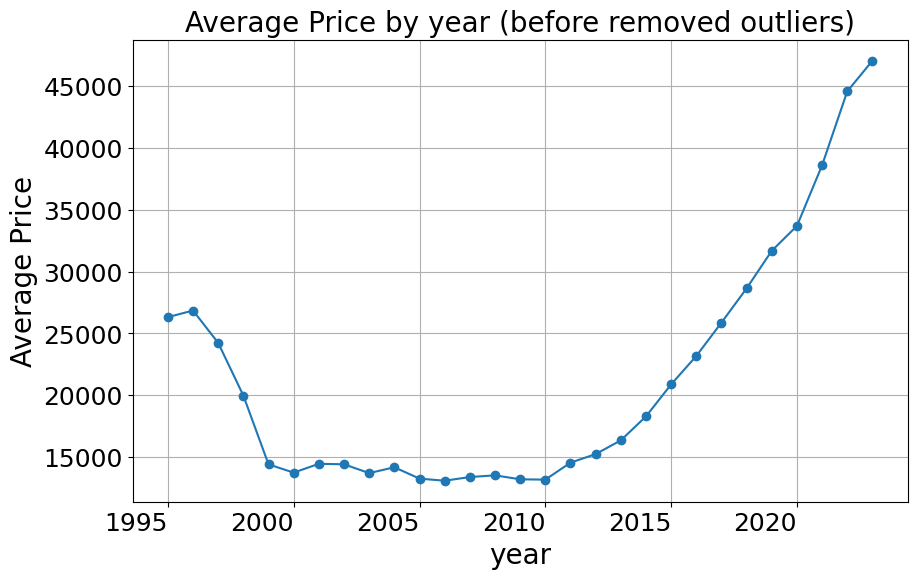

In [39]:
mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (before removed outliers)', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

We can see that in 2009, the price was so abnormal 

In [40]:
Q1 = num_columns[numerical_cols].quantile(0.25)
Q3 = num_columns[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)

# Drop the rows containing outliers
num_columns = num_columns[~outliers_mask]

In [41]:
numerical_cols

['year',
 'mileage',
 'accidents_or_damage',
 'one_owner',
 'personal_use_only',
 'seller_rating',
 'driver_rating',
 'driver_reviews_num',
 'price',
 'City MPG',
 'Highway MPG']

In [42]:
num_columns.shape

(537830, 11)

This is new numerical columns after removed the outliers

In [43]:
new_num_columns= num_columns.dropna() #drop the rows which are contain NAN 
new_num_columns.shape

(300539, 11)

* Plot Average Price vs Years ((after removed outliers))


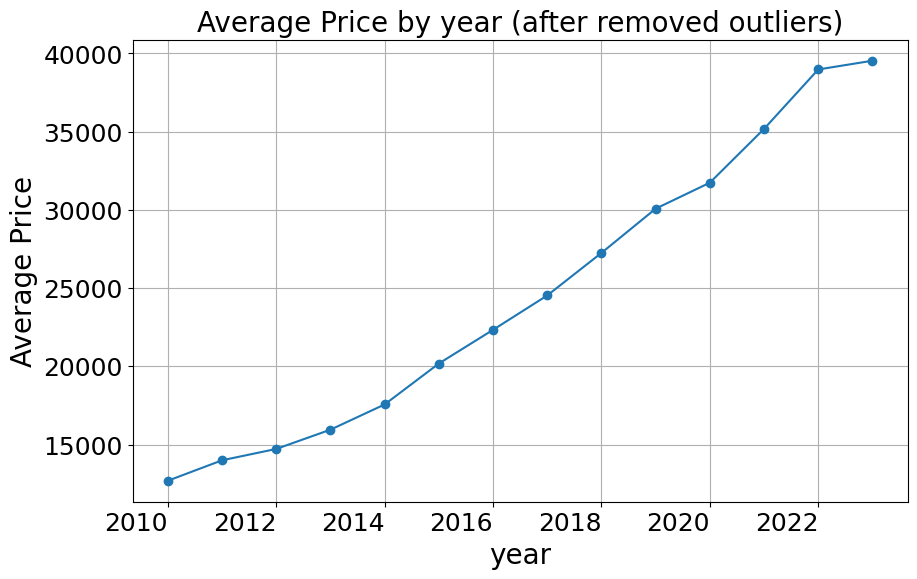

In [44]:
mean_prices_by_year = num_columns.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (after removed outliers)', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

<a id=""></a>
<font color = 'blue'>
* ### **For categorical columns:**


We need to plot them vs Price to see the pattern

* Drop 'model', 'seller_name'

In [45]:
df=df.drop(['model', 'seller_name'], axis=1)

In [46]:
cat_columns= df.select_dtypes(include=['object']).columns.tolist()
#these are the columns that we need to plot to detect the outliers

In [47]:
df = df.loc[~df['transmission'].isin(['Unknown', 'Semi-automatic'])]

In [48]:
def plot_categorical_feature(categorical_columns, data):
    figure = plt.figure(figsize=(6, 6 * len(categorical_columns)))

    for j, cat_feature in enumerate(categorical_columns):
        axes = figure.add_subplot(len(categorical_columns), 1, j + 1)
        data[cat_feature].value_counts().plot(ax=axes, kind='bar')
        axes.set_xlabel(cat_feature, fontsize=20)
        axes.set_ylabel('Frequency', fontsize=20)
        axes.set_title(cat_feature, fontsize=20)
        
    plt.tight_layout()
    plt.show()

# plot categorical features to detect and remove outliers
plot_categorical_feature(cat_columns,df)

In [ ]:
df.shape

* `Drivetrain`

In [ ]:
df = df[df['drivetrain'].isin(['FWD', 'AWD', '4WD', 'RWD'])]

* `Fuel_type`

In [ ]:
df = df[~df['fuel_type'].isin(['Compressed Natural Gas', 'Bio Diesel', 'Automatic'   ])]

* We just keep top 20 classes which are the most common in `exterior_color`, `interior_color`

In [ ]:
value_counts = df['exterior_color'].value_counts()
# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]
# Filter the DataFrame to keep rows in the top 20 classes
df = df[df['exterior_color'].isin(top_20_classes)]

In [ ]:
value_counts = df['interior_color'].value_counts()
# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]
# Filter the DataFrame to keep rows in the top 20 classes
df = df[df['interior_color'].isin(top_20_classes)]

* `Engine Displacement (L)`

In [ ]:
value_counts = df['Engine Displacement (L)'].value_counts()
# Get the top 30 most frequent classes
top_30_classes = value_counts.index[:30]
# Filter the DataFrame to keep rows in the top 30 classes
df = df[df['Engine Displacement (L)'].isin(top_30_classes)]

* `Engine Type` (top 10)

In [ ]:
value_counts = df['Engine Type'].value_counts()
# Get the top 10 most frequent classes
top_10_classes = value_counts.index[:10]
# Filter the DataFrame to keep rows in the top 10 classes
df = df[df['Engine Type'].isin(top_10_classes)]

* `Engine Features`

In [ ]:
value_counts = df['Engine Features'].value_counts()
# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]
# Filter the DataFrame to keep rows in the top 20 classes
df = df[df['Engine Features'].isin(top_20_classes)]

* We just keep top 20 classes which are the most popular in `Transmission`

In [ ]:
# Get the value counts for the 'transmission' column
value_counts = df['transmission'].value_counts()

# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]

# Filter the DataFrame to keep rows with 'transmission' in the top 20 classes
df = df[df['transmission'].isin(top_20_classes)]

Let's re-plot the data after cleaning:

In [ ]:
# Plot after cleaning data
plot_categorical_feature(cat_columns,df)

In [ ]:
df.reset_index(drop=True)   #reset indexes

In [ ]:
df.info()

In [ ]:
cat_data =df.select_dtypes(include=['object'])

In [ ]:
cleaned_df = pd.concat([new_num_columns, cat_data], axis=1)

In [ ]:
cleaned_df= cleaned_df.dropna().reset_index(drop=True)

In [ ]:
def plot_year_vs_price(data):
    mean_prices_grouped_year = data.groupby('year')['price'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(mean_prices_grouped_year['year'], mean_prices_grouped_year['price'], marker='o', linestyle='-')
    plt.title('Average Price by year (after shrinking the range)', fontsize=20)
    plt.xlabel('year', fontsize=20)
    plt.ylabel('Average Price', fontsize=20)
    plt.grid(True)
    plt.show()

plot_year_vs_price(cleaned_df)

<a id="63"></a>
<font color = 'blue'>
### **3. Labeling Encode**

In [ ]:
cat_columns= cleaned_df.select_dtypes(include=['object']).columns.tolist()
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each categorical column
for col in cat_columns:
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])

# Your DataFrame now contains the encoded values
cleaned_df

* Checking the null values on our cleaned dataset

In [ ]:
cleaned_df.isnull().sum()

In [ ]:
cleaned_df['accidents_or_damage'].value_counts()

In [ ]:
cleaned_df=cleaned_df.drop(['accidents_or_damage'], axis=1)

In [ ]:
df.shape

<a id="64"></a>
<font color = 'blue'>
### **4. Correlation Matrix**

The **`correlation matrix`** shows us the correlation coefficients between variables. 
* If the correlation coefficient is close to 1, it appears a strong positive relationship. That means, if one variable increases, the other tends to increase as well.
* If the correlation coefficient is close to -1, it appears a strong negative relationship. That means, if one variable decreases, the other tends to decrease as well.
* If the correlation coefficient is close to 0, it appears a weak or no linear relationship between two variables.

In [ ]:
def heat_map(data, var):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a figure with a specific size
    plt.figure(figsize=(len(var) * 2, len(var) * 1.5))

    # Create a mask for the upper triangle to focus on the center
    mask = np.triu(np.ones_like(correlation_matrix), k=0)

    # Customize the color scale (cmap) to emphasize the center
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Increase the font size for annotations
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask,  vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 18})
    plt.xticks(rotation=45, ha='right',fontsize=20)
    plt.yticks(rotation=0, ha='right',fontsize=20)
    plt.title('Correlation Heatmap',fontsize=20)

    plt.show()

In [ ]:
heat_map(cleaned_df, cleaned_df.columns.tolist())

<div class="alert alert-block alert-info"> <b>Tip:</b> We can see there are some correlated features. We need to select the useful feature carefully to get optimize our model as much as possible </div>

Our target is `Price`, which is strong relationship to many features. However, the variables outside our target exhibit multicollinearity, such as: City MPG - Highway MPG, year-one owner, and Engine features-Engine Type, Engine Displacement(L), Engine Type, City, Highway MPG, etc.

We can also use **`variance_inflation_factor`** to diagnose the multicollinearity. Typically, a high VIF value (usually greater than 10) is an indicator of significant multicollinearity. It means that the variance of the coefficient estimate for that variable is 10 times larger than it would be if there were no multicollinearity. 

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

So, let's  drop some features: 

In [ ]:
df2=cleaned_df.drop(['Engine Type', 'Engine Features','City MPG','interior_color', 'personal_use_only', 'driver_rating','seller_rating'], axis =1)
df2

In [ ]:
heat_map(df2, cleaned_df.columns.tolist())

In [ ]:
calc_vif(df2.drop('price', axis=1))

These are the important features that we will use to fit our models:
**year,
mileage	,
one_owner	,
driver_reviews_num,	
Highway MPG	,
manufacturer,	
transmission,	
drivetrain,	
fuel_type,	
exterior_color,	
Engine Displacement (L),** in dataframe `df2`

<a id="7"></a>
<font color = 'blue'>
## **7. Data Splitting**


In [ ]:
X = df2.drop('price', axis=1)
Y = df2['price']

In [ ]:
random_state=0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<a id="8"></a>
<font color = 'blue'>
## **8. Models Evaluations and Predictions**
   

<a id="81"></a>
<font color = 'blue'>
### **8.1 Multiple Linear Regression**
   

<a id="811"></a>
<font color = 'blue'>
* #### **8.1.1. Using Sequential Feature Selection for the Linear Regression**
      

Let's try the **Sequential Feature Selection** method to choose 10-15 significant variables for our model.

Learn more: [Sequential Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance) (Forward/ Backward)


In [ ]:
lasso_reg = Lasso(fit_intercept=True, random_state=random_state)
sfs = SequentialFeatureSelector(lasso_reg, direction='forward',  n_features_to_select=8).fit(X_train, y_train)

In [ ]:
best_features = sfs.get_feature_names_out()
best_features

In [ ]:
heat_map(df2, best_features)

**We will use these features to fit our models**

In [ ]:
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2']) # these metrics are used to evaluate our models

In [ ]:
X_train=X_train[best_features]
X_test=X_test[best_features]

In [ ]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model 1 MAE:", mae)
print("Model 1 MSE:", mse)
print("Model 1 R2:", r2)

In [ ]:
# Add a constant term to your X_train
X_train1 = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X_train1)

# Fit the model
results = model.fit()

# Display the summary
print(results.summary())

In [ ]:
# Create a scatterplot of fitted values vs. residuals
residuals = y_test - y_pred  # Calculate the residuals

# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values', fontsize=20)
plt.xlabel('Fitted Values (Linear Regression)', fontsize=20)
plt.ylabel('Residuals', fontsize=20)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

This indicates that there may be a **violation of the assumption of linearity** in our linear regression model. This pattern suggests that the relationship between the independent variables (**features**) and the dependent variable (`price`) is not adequately captured by a simple linear model.

So, we need to try **polynomial regression**:

In [ ]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
#MODEL and METRIC COLLECTION
model_collection =[]
mae_collection =[]
mse_collection =[]
r2_collection  =[]
y_test_collection=[]

for d in range(1,5):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # SPLIT THIS NEW POLY DATA SET
    X_train1, X_test1, y_train1, y_test1 = train_test_split(poly_features, Y, test_size=0.3, random_state=random_state)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train1,y_train1)
    model_collection.append(model)

    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train1)
    test_pred = model.predict(X_test1)
    y_test_collection.append(test_pred)
    
    # Calculate Errors

    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train1,train_pred))

    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test1,test_pred))

    # Append errors to lists for plotting later
    mae_collection.append( mean_absolute_error(y_test1, test_pred))
    mse_collection.append( mean_squared_error(y_test1, test_pred))
    r2_collection .append( r2_score(y_test1, test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [ ]:
# Plot the RMSE values for degrees 1, 2,3,4
plt.plot(range(1, 5), train_rmse_errors[:5], label='TRAIN')
plt.plot(range(1, 5), test_rmse_errors[:5], label='TEST')
plt.xlabel("Polynomial Complexity", fontsize=20)
plt.ylabel("RMSE", fontsize=20)
plt.legend()
plt.show()

In [ ]:
print(model_collection)
print(mae_collection )
print(mse_collection )
print(r2_collection  )

We can see that the **polynomial degree 3** could be **the best** since the test error start overfitting at or after degree 4.
So, let create and refit 

In [ ]:
best_degree_index = 3-1
mae = mae_collection[best_degree_index]
mse = mse_collection[best_degree_index]
r2 = r2_collection[best_degree_index]

print("The Polynomial Regression Model MAE:", mae)
print("Polynomial Regression Model MSE:", mse)
print("Polynomial Regression Model R2:", r2)

In [ ]:
# Append metrics to the DataFrame
metrics_df.loc[len(metrics_df)] = [f'Degree {best_degree_index+1} - Polynomial Reg.', mae, mse, r2]
metrics_df

In [ ]:
y_pred = y_test_collection[best_degree_index]

# Calculate the residuals
residuals_poly = y_test1 - y_pred

# Create a scatterplot of fitted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(test_pred, residuals_poly, alpha=0.5)
plt.title('Residuals vs. Fitted Values (Polynomial Regression)', fontsize=20)  # Adjust fontsize as needed
plt.xlabel('Fitted Values (Polynomial Regression)', fontsize=20)  # Adjust fontsize as needed
plt.ylabel('Residuals', fontsize=20)  # Adjust fontsize as needed

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

We can see that the plot does not appear a pattern. That means, there is a linear relationship among variables in polynomial regression.

In [ ]:
# Create a list of degrees for the x-axis (you can adjust this as needed)
degrees = [1, 2, 3, 4]  

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Create a scatter plot for MAE
ax1.plot(degrees, mae_collection, label='MAE', marker='o', linestyle='-')
ax1.set_xlabel("Polynomial Degree", fontsize=20)
ax1.set_ylabel("MAE", fontsize=20)
ax1.set_title("MAE vs. Polynomial Degree", fontsize=20)
ax1.grid(True)

# Create a scatter plot for MSE
ax2.plot(degrees, mse_collection, label='MSE', marker='x', linestyle='-')
ax2.set_xlabel("Polynomial Degree", fontsize=20)
ax2.set_ylabel("MSE", fontsize=20)
ax2.set_title("MSE vs. Polynomial Degree", fontsize=20)
ax2.grid(True)

# Create a scatter plot for R2
ax3.plot(degrees, r2_collection, label='R2', marker='s', linestyle='-')
ax3.set_xlabel("Polynomial Degree", fontsize=20)
ax3.set_ylabel("R2", fontsize=20)
ax3.set_title("R2 vs. Polynomial Degree", fontsize=20)
ax3.grid(True)

# Add a legend to one of the subplots
ax1.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<a id="82"></a>
<font color = 'blue'>
   ### **8.2 Decision Tree**
   

<a id="821"></a>
<font color = 'blue'>
* #### **8.2.1. A Pruned Tree**: Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood.
      

In [ ]:
best_churn_tree = DecisionTreeRegressor(criterion='absolute_error',max_depth=4)
#best_churn_tree = DecisionTreeRegressor(criterion='absolute_error',max_depth=5, min_samples_split=10)

best_churn_tree.fit(X_train, y_train)

y_pred = best_churn_tree.predict(X_test)
score = mean_absolute_error(y_test, y_pred)
print(score)

In [ ]:
ccp_path = best_churn_tree.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,random_state=0,shuffle=True)

grid = skm.GridSearchCV(best_churn_tree,{'ccp_alpha': ccp_path.ccp_alphas},refit=True,cv=kfold, n_jobs=-1,scoring='neg_mean_absolute_error',return_train_score=True) 
grid.fit(X_train, y_train)
print(f"Best Cross-Validation Score: {grid.best_score_}")

In [ ]:
best_tree = grid.best_estimator_ 
print(best_tree)
print(f"Best Tree Depth: {best_tree.get_depth()}")

In [ ]:
# Plot the decision tree with clearer visualization
plt.figure(figsize=(25, 20))  # Adjust the figure size

plot_tree(
    best_tree,
    filled=True,  # Fill nodes with color
    feature_names=X_train.columns,  # Provide feature names for labeling
    fontsize=10,  # Adjust font size
)

plt.title("Car Price Prediction - Decision Tree")
plt.show()
print(export_text(best_tree,feature_names=list(X_train.columns),show_weights=True))

In [ ]:
y_pred=best_tree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Append metrics to the DataFrame
metrics_df.loc[len(metrics_df)] = [type(best_tree).__name__, mae, mse, r2]
metrics_df

<a id="83"></a>
<font color = 'blue'>
### **8.3. Ensemble Method: Random Forest Regression**
   

In [ ]:
param_grid = {'bootstrap': [True],'n_estimators':[ 100,300], "max_depth":[4], 'criterion': ['squared_error'], 'ccp_alpha':[0.1]}
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid_search = skm.GridSearchCV(RandomForestRegressor( random_state=0,n_jobs = -1),param_grid, cv=kfold,return_train_score=True,scoring='neg_mean_absolute_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

In [ ]:
model = grid_search.best_estimator_
model

In [ ]:
grid_search.best_score_

In [ ]:
y_pred=model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Append metrics to the DataFrame
metrics_df.loc[len(metrics_df)] = [type(model).__name__, mae, mse, r2]
metrics_df

<a id="84"></a>
<font color = 'blue'>
   ### **8.4. Ensemble Method: Gradient Boosting Regression**
   

In [ ]:
param_grid = {'learning_rate': [0.1],'n_estimators':[ 100], "max_depth":[4], 'criterion': ['squared_error']}
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid_search = skm.GridSearchCV(GradientBoostingRegressor(  random_state=0), param_grid, cv=kfold, n_jobs=-1,scoring='neg_mean_absolute_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best learning rate
best_learning_rate = grid_search.best_params_['learning_rate']

# Access the best regressor
best_boosting_regressor = grid_search.best_estimator_

# Access the best hyperparameters
best_hyperparameters = grid_search.best_params_

In [ ]:
best_boosting_regressor

In [ ]:
y_pred = best_boosting_regressor.predict(X_test)

In [ ]:
test_error = np.zeros_like(best_boosting_regressor.train_score_)

for idx, y_ in enumerate(best_boosting_regressor.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(best_boosting_regressor.train_score_.shape[0]) 

ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,best_boosting_regressor.train_score_, 'b',label='Training')
ax.plot(plot_idx, test_error ,'r',label='Test') 
ax.set_xlabel("n_estimators", fontsize=20)
ax.set_ylabel("MSE", fontsize=20)
ax.legend();

In [ ]:
grid_search.best_score_

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Append metrics to the DataFrame
metrics_df.loc[len(metrics_df)] = [type(best_boosting_regressor).__name__, mae, mse, r2]
metrics_df

In [ ]:
# Get feature importances and corresponding feature names
feature_importances = best_boosting_regressor.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

In [ ]:
feature_imp = pd.DataFrame( {'importance':best_boosting_regressor.feature_importances_}, index=X_train.columns.tolist())
sorted_feature_imp= feature_imp.sort_values(by='importance', ascending=False)

In [ ]:

plt.barh(sorted_feature_imp.index,sorted_feature_imp['importance'],color = 'g')
plt.xlabel('Importance level')
plt.title('Feature Importance')
plt.grid(axis='x')  # Add a grid on the x-axis
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Plotting
plt.figure(figsize=(10, 10))
plt.pie(sorted_feature_imp['importance'], labels=sorted_feature_imp.index, autopct='%1.1f%%',
    startangle=140, textprops={'fontsize': 18})
plt.title('Feature Importances - Gradient Boosting Regressor', fontsize=16)
plt.show()

<a id="85"></a>
<font color = 'blue'>
### **8.5. Support Vector Machine (SVM)**
   

We need to standardize the numerical data before using them to fit the SVM model.

In [ ]:
best_features

In [ ]:
num_columns = best_features

In [ ]:
X_train1 = pd.DataFrame(StandardScaler().fit_transform(X_train[num_columns]),columns=num_columns,index=X_train.index)
X_test1 = pd.DataFrame(StandardScaler().fit_transform(X_test[num_columns]),columns=num_columns, index=X_test.index)

X_train1 = pd.concat([X_train1, X_train[['drivetrain', 'fuel_type']]], axis=1)
X_test1 = pd.concat([X_test1, X_test[['drivetrain', 'fuel_type']]], axis=1)

In [ ]:
svm = SVR()  # You can specify kernel, C, gamma, etc.
param_grid = {'C':[1], 'kernel':['linear']}

* Create Cross-Validation Splitter and Perform Grid Search with Cross-Validation:

In [ ]:
cross_validator = skm.KFold(n_splits=5, shuffle=True, random_state=0)
grid_search = skm.GridSearchCV(svm, param_grid, cv=cross_validator, scoring='neg_mean_absolute_error')
grid_search.fit(X_train1, y_train)  # X: feature matrix, y: target variable

In [ ]:
best_model = grid_search.best_estimator_  # or random_search.best_estimator_
best_params = grid_search.best_params_  # or random_search.best_params_
best_score = grid_search.best_score_  # or random_search.best_score_
print("The best SVR model: ", best_params)

* Evaluate the Model:


In [ ]:
best_score

In [ ]:
y_pred=best_model.predict(X_test1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Append metrics to the DataFrame
metrics_df.loc[len(metrics_df)] = [type(best_model).__name__, mae, mse, r2]

<a id="86"></a>
<font color = 'blue'>
### **8.6. Comparing Models:**

* **MAE** and **MSE**: Lower values are generally better for both MAE and MSE. If comparing two models, the one with the lower MAE or MSE is considered better in terms of accuracy.
* <b>$R^2$</b>: Higher values of $R^2$ are desirable. $R^2$ represents the proportion of the variance explained by the model, so a higher $R^2$ indicates that the model is a better fit to the data. It ranges from 0 to 1, with higher values indicating better explanatory power.

In [ ]:
metrics_df

In [ ]:
scaled_metrics_df = metrics_df.copy()

# Custom scaling function
def custom_scaling(value, divisor):
    return value / divisor

# Scale MAE and MSE as per your requirements
scaled_metrics_df['Scaled_MAE'] = scaled_metrics_df['MAE'].apply(lambda x: custom_scaling(x, 10000))
scaled_metrics_df['Scaled_MSE'] = scaled_metrics_df['MSE'].apply(lambda x: custom_scaling(x, 1e8))

# Display the scaled values
print(scaled_metrics_df[['Model', 'Scaled_MAE', 'Scaled_MSE', 'R2']])

In [ ]:
# Melt the dataframe for easier plotting
melted_df = pd.melt(scaled_metrics_df, id_vars=['Model'], value_vars=['Scaled_MAE', 'Scaled_MSE', 'R2'], var_name='Metric')

# Plotting
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Model', y='value', hue='Metric', data=melted_df)

# Add values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=20)

# Add font size
plt.xticks(rotation=15, ha='right', fontsize=20)  # Adjust fontsize as needed
plt.yticks(fontsize=20)  # Adjust fontsize as needed
plt.xlabel('Models', fontsize=20)  # Adjust fontsize as needed
plt.ylabel('Scaled Values', fontsize=20)  # Adjust fontsize as needed
plt.title('Scaled Metrics for Each Model', fontsize=20)  # Adjust fontsize as needed
plt.legend(title='Metrics', title_fontsize='18', fontsize='16')  # Adjust fontsize as needed

# Show the plot
plt.tight_layout()
plt.show()

The lower MAE or MSE is considered better in terms of accuracy and higher values of $R^2$ are desirable

<div class="alert alert-block alert-success">
<b>Evaluation:</b>
Based on the `metrics_df` and `plots`, we can see that `Gradient Boosting Regressor` is the best car price predictor.` Multiple Polynomial Regression` give a reasonable metrics. Therefore, we can use Gradient Boosting Regressor and Multiple Polynomial Regression to understand which features have the most significant impact on the predictions. This can provide insights into what aspects of the data are crucial for predicting car prices.
</div>

In [ ]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
print(f"Elapsed time: {elapsed_time/60} minutes")